# Kongsberg testbench model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.linalg as LA
from scipy.signal import lsim, dlsim
import pickle
import opentorsion as ot

The testbench model is based on the small-scale maritime laboratory testbench presented in [Manngård et al. 2022](https://doi.org/10.1016/j.ymssp.2022.108969). The two lowest natural frequencies of the testbench were experimentally determined to be 23.2 Hz and 51.4 Hz.

In [2]:
def testbench():
    '''
    Kongsberg testbench model based on parameters from Manngård et al. (2022).
    '''
    shafts = []
    disks = []
    gears = []

    disks.append(ot.Disk(0, I=6.5e-4))
    shafts.append(ot.Shaft(0, 1, 0, 0, k=1.9039e5, I=1.4420e-4, c=8.0804)) # driving motor, coupling
    shafts.append(ot.Shaft(1, 2, 0, 0, k=6.9487e3, I=3.7880e-6, c=0.2949)) # shaft
    shafts.append(ot.Shaft(2, 3, 0, 0, k=90, I=3e-6, c=0.2387)) # elastomer coupling hub
    shafts.append(ot.Shaft(3, 4, 0, 0, k=90, I=2e-6, c=0.2387)) # elastomer coupling middle piece
    shafts.append(ot.Shaft(4, 5, 0, 0, k=90, I=0, c=0.2387)) # elastomer coupling hubs & shaft
    disks.append(ot.Disk(5, I=7.8091e-3))
    shafts.append(ot.Shaft(5, 6, 0, 0, k=90, I=2e-6, c=0.2387))# elastomer coupling middle piece
    shafts.append(ot.Shaft(6, 7, 0, 0, k=90, I=0, c=0.0013)) # elastomer coupling hub & shaft
    shafts.append(ot.Shaft(7, 8, 0.342e3, 0.008e3, G=80e9, rho=7800)) # new shaft (shaft & coupling)
    shafts.append(ot.Shaft(8, 9, 0, 0, k=5.4e3, I=6.5e-6, c=0.2292)) # torque transducer
    shafts.append(ot.Shaft(9, 10, 0, 0, k=4.19e4, I=5.65e-5, c=1.7783)) # torque transducer & coupling
    shafts.append(ot.Shaft(10, 11, 0, 0, k=1.2192e3, I=4.2685e-6, c=0.5175)) # shaft
    gear1 = ot.Gear(11, I=3.2467e-4, R=1)
    gears.append(gear1) # shaft & gear
    gears.append(ot.Gear(12, I=0, R=3, parent=gear1))
    shafts.append(ot.Shaft(12, 13, 0, 0, k=3.1e4, I=1.2e-4, c=1.3157)) # coupling
    shafts.append(ot.Shaft(13, 14, 0, 0, k=1.1429e3, I=1.1516e-5, c=0.0485)) # shaft
    shafts.append(ot.Shaft(14, 15, 0, 0, k=3.1e4, I=1.3152e-4, c=1.3157)) # shaft & coupling
    shafts.append(ot.Shaft(15, 16, 0, 0, k=1.2192e4, I=4.2685e-6, c=0.5175)) # shaft
    gear2 = ot.Gear(16, I=2.6927e-4, R=1)
    gears.append(gear2) # shaft & gear
    gears.append(ot.Gear(17, I=0, R=4, parent=gear2))
    shafts.append(ot.Shaft(17, 18, 0, 0, k=1.38e5, I=1.8e-4, c=5.8569)) # coupling
    shafts.append(ot.Shaft(18, 19, 0, 0, k=2e4, I=2e-5, c=0.8488)) # torque transducer
    shafts.append(ot.Shaft(19, 20, 0, 0, k=1.38e5, I=2e-4, c=5.8569)) # torque trandsucer & coupling
    shafts.append(ot.Shaft(20, 21, 0, 0, k=1.2192e4, I=4.2685e-6, c=0.5175)) # shaft
    disks.append(ot.Disk(21, I=4.9535e-2)) # shaft, mass, planetary gear & load generator

    assembly = ot.Assembly(shafts, disk_elements=disks, gear_elements=gears)
    _, f, _ = assembly.modal_analysis()
    print(f.round(2))

    return assembly


The lowest natural frequencies of the above model (23.5 Hz and 60 Hz) are relatively close to the experimental results. 

In [3]:
def testbench_measured():
    '''
    Kongsberg testbench model with measured component dimensions.
    '''
    
    shafts, disks, gears = [], [], []

    shafts = []
    disks = []
    gears = []

    '''Driving motor, motor shaft, aluminium copuling, steel shaft'''
    disks.append(ot.Disk(0, I=6.5e-4))
    shafts.append(ot.Shaft(0, 1, 15, 24))
    shafts.append(ot.Shaft(1, 2, 79.45, 66, idl=20, G=27e9, E=70e9, rho=2710))
    shafts.append(ot.Shaft(2, 3, 6, 16))

    '''Elastomer coupling'''
    shafts.append(ot.Shaft(3, 4, (51.75/3), 32.2, idl=16, G=27e9, E=70e9, rho=2710)) # elastomer coupling hub
    shafts.append(ot.Shaft(4, 5, 0, 0, k=90, I=0)) # elastomer coupling soft part
    shafts.append(ot.Shaft(5, 6, (51.75/3), 32.2, idl=16, G=27e9, E=70e9, rho=2710)) # elastomer coupling middle piece
    shafts.append(ot.Shaft(6, 7, 0, 0, k=90, I=0)) # elastomer coupling soft part
    shafts.append(ot.Shaft(7, 8, (51.75/3), 32.2, idl=16, G=27e9, E=70e9, rho=2710)) # elastomer coupling hub

    '''Shaft, mass, shaft'''
    shafts.append(ot.Shaft(8, 9, 39, 16))
    disks.append(ot.Disk(9, I=7.7e-3))
    shafts.append(ot.Shaft(9, 10, 39, 16))

    '''Elastomer coupling'''
    shafts.append(ot.Shaft(10, 11, (51.75/3), 32.2, idl=16, G=27e9, E=70e9, rho=2710)) # elastomer coupling hub
    shafts.append(ot.Shaft(11, 12, 0, 0, k=90, I=0)) # elastomer coupling soft part
    shafts.append(ot.Shaft(12, 13, (51.75/3), 32.2, idl=16, G=27e9, E=70e9, rho=2710)) # elastomer coupling middle piece
    shafts.append(ot.Shaft(13, 14, 0, 0, k=90, I=0)) # elastomer coupling soft part
    shafts.append(ot.Shaft(14, 15, (51.75/3), 32.2, idl=16, G=27e9, E=70e9, rho=2710)) # elastomer coupling hub

    '''Shaft, bellow coupling, torque transducer, bellow coupling'''
    shafts.append(ot.Shaft(15, 16, 319, 8)) # long shaft
    shafts.append(ot.Shaft(16, 17, 0, 0, k=15e3, I=2e-5)) # coupling
    shafts.append(ot.Shaft(17, 18, 0, 0, k=5400, I=1.3e-5)) # torque transducer
    shafts.append(ot.Shaft(18, 19, 0, 0, k=15e3, I=2e-5)) # coupling

    '''First gearbox, shafts, couplings'''
    gear1 = ot.Gear(19, I=3.2467e-4, R=1)
    gears.append(gear1) # gear
    gears.append(ot.Gear(20, I=0, R=3, parent=gear1))
    shafts.append(ot.Shaft(20, 21, 0, 0, k=3.1e4, I=1.2e-4)) # coupling
    shafts.append(ot.Shaft(21, 22, 33.5, 16)) # shaft
    shafts.append(ot.Shaft(22, 23, 0, 0, k=3.1e4, I=1.2e-4)) # coupling
    shafts.append(ot.Shaft(23, 24, 62, 25)) # shaft

    '''Second gearbox, shafts, couplings'''
    gear2 = ot.Gear(24, I=7.315601e-5, R=1)
    gears.append(gear2) # shaft & gear
    gears.append(ot.Gear(25, I=1.1265292e-2, R=4, parent=gear2))
    shafts.append(ot.Shaft(25, 26, 105, 24.5)) # shaft
    shafts.append(ot.Shaft(26, 27, 0, 0, k=138e3, I=2.8e-4)) # coupling
    shafts.append(ot.Shaft(27, 28, 0, 0, k=2e4, I=4e-5)) # torque transducer
    shafts.append(ot.Shaft(28, 29, 0, 0, k=138e3, I=2.8e-4)) # coupling
    shafts.append(ot.Shaft(29, 30, 117, 25)) # shaft
    disks.append(ot.Disk(30, I=7.5863e-3)) # mass
    shafts.append(ot.Shaft(30, 31, 77, 25))
    shafts.append(ot.Shaft(31, 32, 0, 0, k=31e3, I=0.12e-3))

    '''Planetary gear, driving motor'''
    #gear3 = ot.Gear(32, I=0, R=8) # planetary gear
    #gears.append(gear3)
    #gears.append(ot.Gear(33, I=1.32e-4, R=1, parent=gear3))
    disks.append(ot.Disk(32, I=6.5e-4)) # load generator

    assembly = ot.Assembly(shafts, disk_elements=disks, gear_elements=gears)
    _, f, _ = assembly.modal_analysis()
    print(f.round(2))

    return assembly

# The state-space model of the testbench

The conventional state-space model presented in e.g. Friswell

$$ \begin{bmatrix} \dot{\theta} \\ \ddot{\theta} \end{bmatrix} = \underbrace{\begin{bmatrix} \boldsymbol{0} & \textbf{I} \\ -\textbf{M}^{-1}\textbf{K} & -\textbf{M}^{-1}\textbf{C} \end{bmatrix}}_{\textbf{A}} \begin{bmatrix} \theta \\ \dot{\theta} \end{bmatrix} + \underbrace{\begin{bmatrix} \boldsymbol{0} \\ \textbf{M}^{-1} \end{bmatrix}}_{\textbf{B}} \textbf{T} $$

In [4]:
def state_matrices(assembly):
    """
    Create state-space matrices A and B of an openTorsion assembly.

    Parameters:
        assembly : openTorsion assembly instance
            Mechanical drivetrain model

    Returns:
        A : numpy.ndarray
            The state matrix
        B : numpy.ndarray
            The input matrix
    """
    M, C, K = assembly.M(), assembly.C(), assembly.K()  # Mass and stiffness matrices
    Z = np.zeros(M.shape)
    I = np.eye(M.shape[0])
    M_inv = LA.inv(M)

    A = np.vstack([np.hstack([Z, I]), np.hstack([-M_inv @ K, -M_inv @ C])])

    B = np.vstack([Z, M_inv])

    return A, B

In [5]:
def excitation_matrix(t, dof, motor, load):
    '''
    Excitation in matrix form. This function assumes the load is
    always applied to the first and last node of the drivetrain.

    Parameters
    t : ndarray
        timesteps
    load : lambda function
        excitation function
    dof : int
        number of degrees of freedom of the drivetrain
    '''
    U = np.zeros((len(t), dof))

    U[:,0] += motor
    U[:,-1] -= load

    return U

In [7]:
data = np.genfromtxt('../../data/Experiment31.csv', delimiter=',')

In [8]:
# structure of data:
# [0] = Time
# [1-22] = Angular speeds
# [23-43] = Torques
# [44] = Motor Torque
# [45] = Propeller Torque

time = data[:,0]
motor_torque = data[:,-2]
propeller_torque = data[:,-1]

angular_speed_7 = data[:,7]
upper_torque_sensor = data[:,31]

In [9]:
def c2d(A, B, Ts):
    """
    C2D computes a discrete-time model of a system (A_c,B_c) with sample time T_s.
    The function returns matrices A,B of the discrete-time system.
    """
    m, n = A.shape
    nb = B.shape[1]

    s = np.concatenate([A,B], axis=1)
    s = np.concatenate([s, np.zeros((nb, n+nb))], axis=0)
    S = LA.expm(s*Ts)
    Ad = S[0:n,0:n]
    Bd = S[0:n,n:n+nb+1]
    
    return Ad, Bd

In [10]:
assembly = testbench()
A, B = state_matrices(assembly)
C, D = np.eye(B.shape[0]), np.zeros(B.shape)

dof = assembly.M().shape[0]
U = excitation_matrix(time, dof, motor_torque, propeller_torque)

dt = np.mean(np.diff(time))

[0.000000e+00 0.000000e+00 2.354000e+01 2.354000e+01 2.566000e+01
 2.566000e+01 6.013000e+01 6.092000e+01 6.210000e+01 6.210000e+01
 8.606000e+01 1.883200e+02 1.883200e+02 4.021800e+02 4.021800e+02
 7.604000e+02 7.604000e+02 1.124620e+03 1.124620e+03 1.902300e+03
 1.902300e+03 2.476650e+03 2.476650e+03 3.172520e+03 3.172520e+03
 3.360790e+03 3.360790e+03 3.517990e+03 3.517990e+03 3.635520e+03
 3.635520e+03 5.367610e+03 5.367610e+03 5.776600e+03 5.776600e+03
 5.966730e+03 5.966730e+03 8.508430e+03 9.439520e+03 3.235839e+04]


In [11]:
A_d, B_d = c2d(A, B, dt)

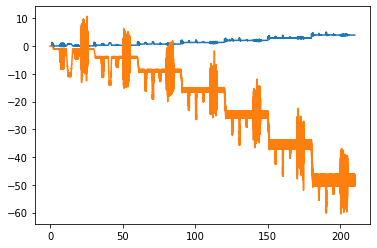

In [12]:
plt.plot(time, U[:,0])
plt.plot(time, U[:,-1])

In [13]:
tout, yout, xout = lsim((A, B, C, D), U, time)

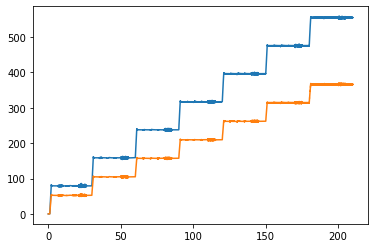

In [14]:
plt.plot(tout, yout[:,26])
plt.plot(time, angular_speed_7)

In [15]:
dtout, dyout, dxout = dlsim((A_d, B_d, C, D, dt), U, time)

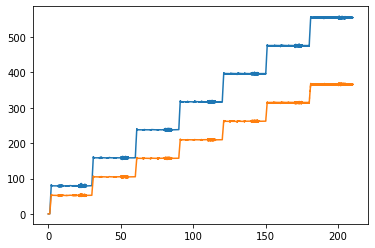

In [16]:
plt.plot(dtout, dyout[:,26])
plt.plot(time, angular_speed_7)

# Matlab model state-space matrices

In [18]:
time_steps = np.genfromtxt('../../data/ice_excitation/times.csv', delimiter=',')
motor = np.genfromtxt('../../data/ice_excitation/motor.csv', delimiter=',')
propeller = np.genfromtxt('../../data/ice_excitation/propeller.csv', delimiter=',')
angular_speeds = np.genfromtxt('../../data/ice_excitation/speed_measurements.csv', delimiter=',')
shaft_torque = np.genfromtxt('../../data/ice_excitation/torque_measurements.csv', delimiter=',')

In [20]:
A_mat = np.genfromtxt('../../data/testbench_models/MSSP/testbench_A.csv', delimiter=',')
B_mat = np.genfromtxt('../../data/testbench_models/MSSP/testbench_B.csv', delimiter=',')
C_mat = np.genfromtxt('../../data/testbench_models/MSSP/testbench_C.csv', delimiter=',')
D_mat = np.genfromtxt('../../data/testbench_models/MSSP/testbench_D.csv', delimiter=',')

ts = np.mean(np.diff(time_steps))
A_mat_d, B_mat_d = c2d(A_mat, B_mat, ts)
UU = np.vstack((motor, propeller)).T

In [21]:
# sensors at indices 7, 8, 31
# gear1 at node 12 (3:1), gear 2 at node 17 (4:1)
rot_speed = np.mean([angular_speeds[0,0], angular_speeds[1,0]])
tor = shaft_torque[0]
x0 = np.zeros(43)

In [22]:
# calculate an initial state for the discrete-time simulation
CCc = np.eye(B_mat.shape[0])
DDc = np.zeros((CCc.shape[0], B_mat.shape[1]))
_, initial_states_c, _ = lsim((A_mat, B_mat, CCc, DDc), UU, time_steps)

In [23]:
# continuous-time simulation
tout_mat, yout_mat, xout_mat = lsim((A_mat, B_mat, C_mat, D_mat), UU, time_steps, X0=initial_states_c[-1,:])

In [24]:
# calculate an initial state for the discrete-time simulation
CC = np.eye(B_mat_d.shape[0])
DD = np.zeros((CC.shape[0], B_mat_d.shape[1]))
_, initial_states, _ = dlsim((A_mat_d, B_mat_d, CC, DD, ts), UU, t=time_steps)

In [25]:
dtout_mat, dyout_mat, dxout_mat = dlsim((A_mat_d, B_mat_d, C_mat, D_mat, ts), UU, t=time_steps, x0=initial_states[-1,:])

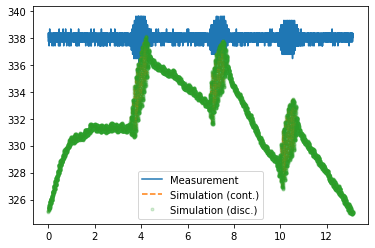

In [26]:
plt.plot(time_steps, angular_speeds[0,:], label='Measurement')
plt.plot(tout_mat, yout_mat[:,0], '--', label='Simulation (cont.)')
plt.plot(dtout_mat, dyout_mat[:,0], '.', label='Simulation (disc.)', alpha=0.2)
plt.legend()
plt.show()

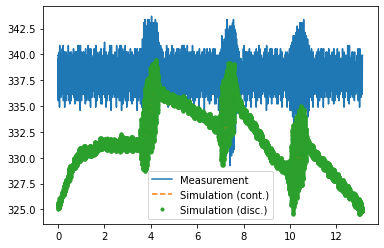

In [27]:
plt.plot(time_steps, angular_speeds[1,:], label='Measurement')
plt.plot(tout_mat, yout_mat[:,1], '--', label='Simulation (cont.)')
plt.plot(dtout_mat, dyout_mat[:,1], '.', label='Simulation (disc.)')
plt.legend()
#plt.xlim(6,12)
#plt.ylim(325,345)
plt.show()

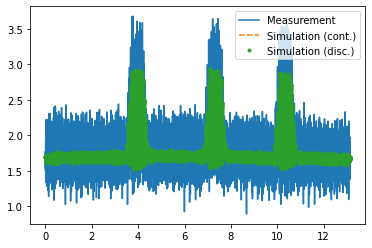

In [28]:
plt.plot(time_steps, shaft_torque, label='Measurement')
plt.plot(tout_mat, yout_mat[:,2], '--', label='Simulation (cont.)')
plt.plot(dtout_mat, dyout_mat[:,2], '.', label='Simulation (disc.)')
plt.legend()
plt.show()

# OpenTorsion state-space model with shaft torque as a state

## TODO: (Geared systems not supported)

The model is defined to have shaft torques and nodal rotational speeds as states. The state-space model is as follows (details in the "modified_state_matrix_2dof" notebook):

$$ \begin{bmatrix} \dot{\tau}_{1,2} \\ \vdots \\ \dot{\tau}_{n-1,n} \\ \ddot{\theta}_1 \\ \vdots \\  \ddot{\theta}_n \end{bmatrix}_{2n-1 \times 1} = \textbf{X}_{2n-1 \times 2n} \textbf{A}_{2n \times 2n} \textbf{X}^{-1}_{2n \times 2n-1} \begin{bmatrix} \tau_{1,2} \\ \vdots \\ \tau_{n-1,n} \\ \dot{\theta}_1 \\ \vdots \\ \dot{\theta}_n \end{bmatrix}_{2n-1 \times 1} + \textbf{X}_{2n-1 \times 2n} \textbf{B}_{2n-1 \times n} \begin{bmatrix} T_M \\ 0 \\ \vdots \\ 0 \\ T_L \end{bmatrix}_{n \times 1} $$

where $n$ is the number of degrees of freedom of the system, $\textbf{A}$ and $\textbf{B}$ are the state matrices and $T_M$ is the motor torque (applied on node 0) and $T_L$ is the load torque (applied on the last node).

In [29]:
def similarity_transform(A, B, k_values, ndof):
    """
    Used to transform the state-matrices to be compatible with shaft torque as a state.
    """
    rows = ndof-1
    cols = ndof
    if len(k_values) != rows:
        print("wrong amount of stiffness values / dofs")
        return
    
    X_up = np.zeros((rows, cols))
    X_down = np.eye(cols)
    Z_up = np.zeros(X_up.shape)
    Z_down = np.zeros(X_down.shape)
    
    for i in range(rows):
        X_up[i,i] = -k_values[i]
        X_up[i,i+1] = k_values[i]
    
    X_matrix = np.vstack([np.hstack([X_up, Z_up]), np.hstack([Z_down, X_down])])
    
    X_inv = X_matrix.T @ np.linalg.inv(X_matrix @ X_matrix.T)
    
    return X_matrix @ A @ X_inv, X_matrix @ B

In [47]:
gear_ratios = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1/3, 1/3, 1/3, 1/3, 1/4, 1/4, 1/4, 1/4])
k_values = -np.diag(assembly.K(), 1) * gear_ratios
print(k_values.shape)
A_, B_ = state_matrices(assembly)
n_dofs = assembly.M().shape[0]
A_mod, B_mod = similarity_transform(A_, B_, k_values, n_dofs)
C_mod, D_mod = np.eye(B_mod.shape[0]), np.zeros(B_mod.shape)

(19,)


In [48]:
A_mod_d, B_mod_d = c2d(A_mod, B_mod, dt)

In [49]:
tout_mod, yout_mod, xout_mod = lsim((A_mod, B_mod, C_mod, D_mod), U, time)

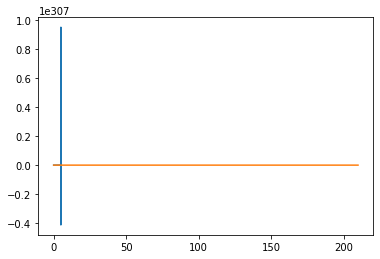

In [50]:
plt.plot(tout_mod, yout_mod[:,27])
plt.plot(time, upper_torque_sensor)

In [51]:
dtout, dyout, dxout = dlsim((A_mod_d, B_mod_d, C_mod, D_mod, dt), U, time)

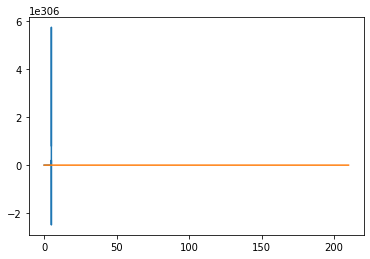

In [52]:
plt.plot(dtout, dyout[:,26])
plt.plot(time, angular_speed_7)